In [ ]:
from sklearn.datasets import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [30]:
digit = load_digits() # 8x8 pixel images of digits 0-9 (1797 images)
dig = pd.DataFrame(digit['data'][0:1700]) 
print(dig.head())
print(digit.keys()) # we will focus on 'data' and 'target' keys

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


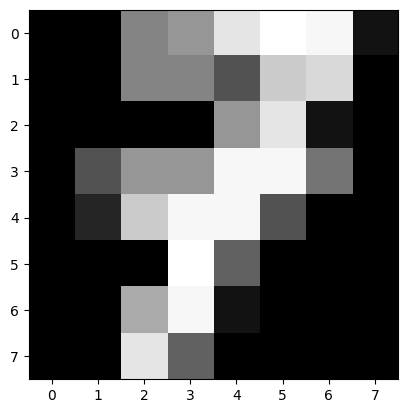

In [31]:
plt.imshow(digit['images'][7], cmap='Greys_r')
plt.show()

In [32]:
train_x = digit.data # input variable
train_y = digit.target # output variable

# split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.25)

The maximum accuracy is: 0.9844444444444445 for k in [3]


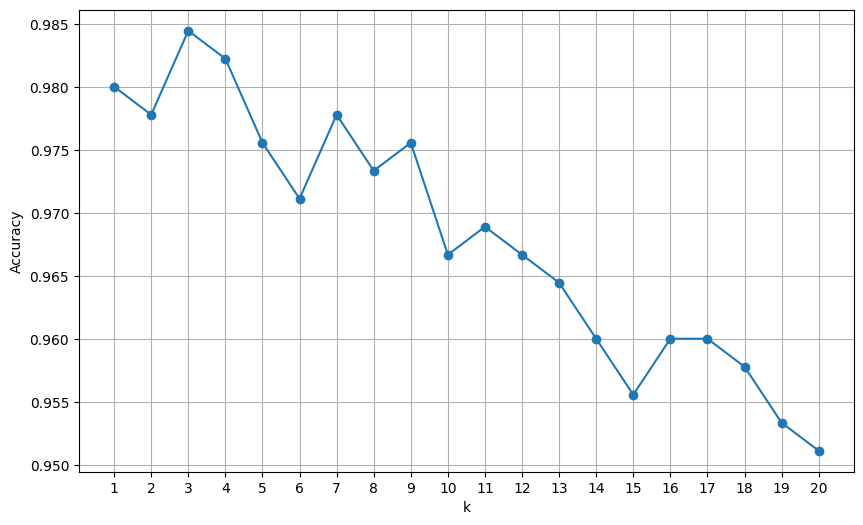

In [33]:
# Question 1

k_values = list(range(1, 21)) # Test for k from 1 to 20
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

max_accuracy = max(accuracy_scores)
max_indices = [i+1 for i, score in enumerate(accuracy_scores) if score == max_accuracy]
print(f"The maximum accuracy is: {max_accuracy} for k in {max_indices}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [34]:
# Naive Bayesian (SPAM Filter)

# "emails" dataset composed of 5572 emails labeled as spam or not spam
df = pd.read_csv('./DB/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

# Question 2
print(df.head())
print(df.describe())
print(df.info())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AZIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# returns a list of tokens for a given text

def process(text):
    text = text.lower() # lowercase it
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming, for exple "running" -> "run"
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

In [37]:
# Testing
print(process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!'))

# Test on our dataset
print(df['message'][:20].apply(process))

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']
0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, 

In [38]:
# TfidfVectorizer is used to convert a collection of raw documents 
# to a matrix: each row is a document and each column is a word from the text
# TF term frequency: the number of times a word appears in a document 
# divided by the total number of words in the document.
# IDF inverse document frequency: the logarithm of the number of documents
# divided by the number of documents that contain the word w.
# TF-IDF = TF * IDF

In [39]:
tfidfv = TfidfVectorizer(analyzer=process) # only unique words in the dataset

data = tfidfv.fit_transform(df['message'])
mess = df.iloc[2]['message'] # 3rd column message
print(mess)

print(tfidfv.transform([mess])) # sparse matrix, only non-zero values are stored

j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'),
tfidfv.get_feature_names_out()[i],sep='\t')

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (1, 8097)>
  Coords	Values
  (0, 72)	0.2330497030932461
  (0, 413)	0.09987750376879972
  (0, 420)	0.22518719340674634
  (0, 433)	0.22518719340674634
  (0, 833)	0.2190885570936267
  (0, 1180)	0.16669800498830506
  (0, 2076)	0.19516151371199045
  (0, 2246)	0.20302402339849024
  (0, 2748)	0.3571909758763146
  (0, 2868)	0.4660994061864922
  (0, 2969)	0.16669800498830506
  (0, 3091)	0.11505037200973967
  (0, 4592)	0.15903719770411495
  (0, 5768)	0.2330497030932461
  (0, 5815)	0.2330497030932461
  (0, 5856)	0.16027970945850903
  (0, 6959)	0.11759458460817876
  (0, 7099)	0.2190885570936267
  (0, 7276)	0.12336193745345178
  (0, 7708)	0.14471405235314777
  (0, 7741)	0.18906287739887084
index	idf	tfidf	term
72	8.5271	0.2330	08452810075over18
413	3.6544	

In [40]:
########### TRAIN ############
spam_filter = Pipeline([
('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
('classifier', MultinomialNB()) # train on TFIDF vectors with NB
])

x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21)
spam_filter.fit(x_train, y_train)

######## TEST ##############
predictions = spam_filter.predict(x_test)
count = 0 # number of wrong predictions
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]: # compares actual vs predicted
        print(x_test.iloc[i])
        count += 1

Send a logo 2 ur lover - 2 names joined by a heart. Txt LOVE NAME1 NAME2 MOBNO eg LOVE ADAM EVE 07123456789 to 87077 Yahoo! POBox36504W45WQ TxtNO 4 no ads 150p
sexy sexy cum and text me im wet and warm and ready for some porn! u up for some fun? THIS MSG IS FREE RECD MSGS 150P INC VAT 2 CANCEL TEXT STOP
Twinks, bears, scallies, skins and jocks are calling now. Don't miss the weekend's fun. Call 08712466669 at 10p/min. 2 stop texts call 08712460324(nat rate)
Hey Boys. Want hot XXX pics sent direct 2 ur phone? Txt PORN to 69855, 24Hrs free and then just 50p per day. To stop text STOPBCM SF WC1N3XX
YES! The only place in town to meet exciting adult singles is now in the UK. Txt CHAT to 86688 now! 150p/Msg.
SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO
LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp

In [ ]:
print('Total number of test cases:', len(y_test))

# Question 3-a
print('Number of wrong of predictions:', count)

In [ ]:
# Quesion 3-b
false_negatives = []
for i in range(len(y_test)):
    if y_test.iloc[i] == 'spam' and predictions[i] == 'ham':
        false_negatives.append(x_test.iloc[i])

print("****** Messages classés à tort comme ham : ******")
for msg in false_negatives:
    print(">>>", msg)

# Option 2 pour repondre a 3-b
# errors = x_test[(predictions == 'ham') & (y_test == 'spam')]
# print(errors)

In [ ]:
# Question 3-c
message = ['Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.']
prediction = spam_filter.predict(message)
print(f"Le message est classé comme : {prediction[0]}")
# Option 2 pour repondre a 3-c
# new_message = ["Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600."]
# result = spam_filter.predict(new_message)
# print(result[0])

In [ ]:
#Calculez Rappel Précision F1 score
print(classification_report(predictions, y_test))

In [46]:
# Linear Regression: Univariate (Profit prediction)

df = pd.read_csv('./DB/univariateLinearRegression.csv')
    # 96 rows and 2 columns (population and profit)

In [47]:
# All rows from the first column
X = df.iloc[0:len(df),0]

# All rows from the second column
Y = df.iloc[0:len(df),1] 

In [48]:
# Question 4: Data Visualization

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) 
print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: 1.2135472539083587
Intercept: -4.211504005424093


In [49]:
# For each x value, calculate the corresponding estimated y value
def F(x):
    return slope * x + intercept 

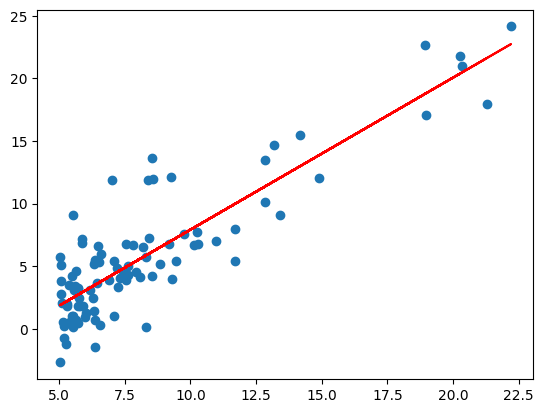

In [50]:
fitLine = F(X)
plt.scatter(X,Y) # input data
plt.plot(X, fitLine, c='r') # linear regression model
plt.show() 

In [51]:
# Based on this analysis, cities with larger populations are 
# generally more attractive for opening new food trucks.
# We can clearly see that the red line approaches almost all 
# the points of the data set as closely as possible.

In [52]:
print(f"Predicted profit for a city with a population of 20,270: {F(20.27):.2f}\nwhile the actual profit is 21.767")

Predicted profit for a city with a population of 20,270: 20.39
while the actual profit is 21.767


In [55]:
# Linear Regression: Multivariate (House price prediction)

# foreach house, we have 3 features: size, number of bedrooms, and price.
df = pd.read_excel('./DB/multivariateLinearRegression.xlsx')
print(df.head()) 

   taille_en_pieds_carre  nb_chambres    prix
0                   2104            3  399900
1                   1600            3  329900
2                   2400            3  369000
3                   1416            2  232000
4                   3000            4  539900


In [56]:
# Price : output variable
Y = df["prix"]

# Size and number of bedrooms : input variables
X = df[['taille_en_pieds_carre','nb_chambres']] 

In [57]:
# Question 5: Data Visualization

# To get a proper visualization of the data, we will start
# by standardizing the data to have a mean of 0 and a standard deviation of 1.

scale = StandardScaler()
X_scaled = scale.fit_transform(X[['taille_en_pieds_carre','nb_chambres']].to_numpy())
# print(X_scaled) 


In [58]:
# OLS (Ordinary Least Squares) method is used to estimate the unknown 
# parameters in a linear regression model, by minimizing the sum of the
# squared differences between the observed and predicted values.

model = sm.OLS(Y, X).fit()
print(model.summary()) 


                                 OLS Regression Results                                
Dep. Variable:                   prix   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              631.4
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                    1.19e-33
Time:                        23:08:16   Log-Likelihood:                         -589.11
No. Observations:                  47   AIC:                                      1182.
Df Residuals:                      45   BIC:                                      1186.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [59]:
# The summary() method provides a lot of information about the model,
# we will focus on the coefficients of the model.

In [60]:
def predict_price_of_house(taille_maison, nb_chambre):
 return 140.8611 * taille_maison + 1.698e+04 * nb_chambre

In [61]:
print(f"Predicted price of a house with 4478 sq ft and 5 bedrooms: {predict_price_of_house(4478,5):.2f}\nwhile the actual price is 699900")

Predicted price of a house with 4478 sq ft and 5 bedrooms: 715676.01
while the actual price is 699900


In [63]:
# Polynomial Regression (Salary prediction)

df_sal = pd.read_csv('./DB/Position_Salaries.csv')
df_sal.head() 


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [64]:
# Question 6

X = df_sal.iloc[:, 1:-1].values # the level is independent (second column)
y = df_sal.iloc[:, -1].values # the salary dependends on the level (last column)

# Train linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Train polynomial regression model
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y) 

LinearRegression()